# GBM Function Development

py37_benzene.yml environment

Development notebook that will be converted into a .py script for calling in real notebooks.

In [1]:
#import datetime # imports datetime for picking beginning and end dates for the analysis
import pandas as pd# imports pandas for dataframe manipulation
import numpy as np# imports numpy
import matplotlib as mpl# for data visualization
mpl.rcParams['figure.figsize'] = (25,8)# sets the plot size to 12x8
from matplotlib import pyplot as plt# for shorter lines with plotting
from statsmodels.tsa.stattools import adfuller  # Statistical test for stationary data
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import os, sys
#from fitter import Fitter

import warnings # to hide warning messages
warnings.filterwarnings('ignore')


In [2]:
# Define location for custom functions
module_path = os.path.abspath(os.path.join('../Functions'))

# Verify it's accessible for loading
if (module_path not in sys.path) & (os.path.isdir(module_path)):
    sys.path.append(module_path)
    print('Added', module_path, 'to system paths')
elif (module_path in sys.path) & (os.path.isdir(module_path)):
    print(module_path, 'ready to be used for import')
else:
    print(module_path, 'is not a valid path')

# Import Custom Functions
try: from multi_plot import * # Allows for plotting of multiple columns in a data frame
except: print('failed to load multi_plot')
#default: print('Loaded multiplot')

try: from StationaryTools import *
except: print('Failed to load StationaryTools')
#default: print('Loaded StationaryTools')

try: from RegressionTools import *
except: print('Failed to load RegressionTools')
#default: print('Loaded RegressionTools')

try: from NaiveForecasting import *
except: print('Failed to load NaiveTools')
#default: print('Loaded NaiveTools')



Added c:\Users\baanders\Documents\Benzene Forecasting\Scripts\Functions to system paths
Loaded multiplot
Loaded StationaryTools
c:\Users\baanders\Documents\Benzene Forecasting\Scripts\Functions ready to be used for import
Loaded multiplot
Loaded StationaryTools
Loaded RegressionTools


In [3]:
dataroot = '../../Data/Parquet/'
ifilename = 'combined' #_linear' #_ffill
dfall = pd.read_parquet(dataroot+ifilename+'.parquet')
print(ifilename + ' dataset loaded with shape', dfall.shape, 'and', dfall.isna().sum().sum(), 'NaN values')

[col for col in dfall if col.startswith('Benzene')]

fit_col='Benzene-Spot, Current Month, High-N/A-Cents per Gallon-FOB Houston, TX-North America'

combined dataset loaded with shape (911, 153) and 113811 NaN values


2017-12-28 00:00:00
2018-01-04 00:00:00
Training Data Description
        Benzene-Spot, Current Month, High-N/A-Cents per Gallon-FOB Houston, TX-North America
count                                         157.000000                                   
mean                                         1975.332866                                   
std                                           328.419187                                   
min                                          1416.800000                                   
25%                                          1688.000000                                   
50%                                          1964.800000                                   
75%                                          2166.400000                                   
max                                          2830.400000                                    
Testing Data Description
        Benzene-Spot, Current Month, High-N/A-Cents per Gallon-FOB Houston, TX-

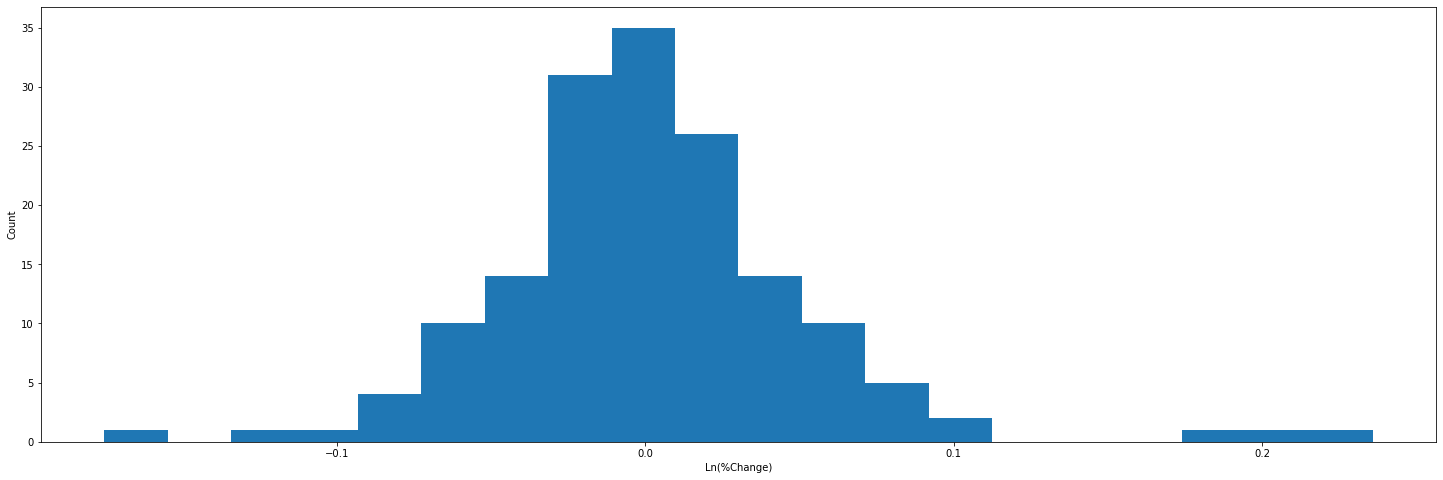

Last date interval of 7 days 00:00:00 will be used for intervals into the future.  50 points after 2017-12-28 00:00:00
Forecasting will be performed for each step size above from 2017-12-28 00:00:00 to 2018-12-06 00:00:00
   mu= 0.001971618881284247
sigma= 0.103011104573171
   S0= -0.04676961648999588

Drift:
 [-0.00333402 -0.02000415 -0.03667427 -0.0533444  -0.07001452 -0.08668465
 -0.10335477 -0.1200249  -0.13669502 -0.15336515]

GBM:
 (50, 100000) 
                0         150       300       450       600       750    \
2017-12-28 -0.046132 -0.046593 -0.047477 -0.046941 -0.047514 -0.046091   
2018-03-08 -0.044509 -0.044264 -0.045712 -0.046227 -0.048444 -0.044515   
2018-05-17 -0.043436 -0.042593 -0.044523 -0.043211 -0.048059 -0.042303   
2018-07-26 -0.042741 -0.039806 -0.043087 -0.040164 -0.046417 -0.043077   
2018-10-04 -0.041554 -0.039173 -0.042112 -0.041772 -0.043495 -0.038851   

               900       1050      1200      1350   ...     98550     98700  \
2017-12-28 -0.04532

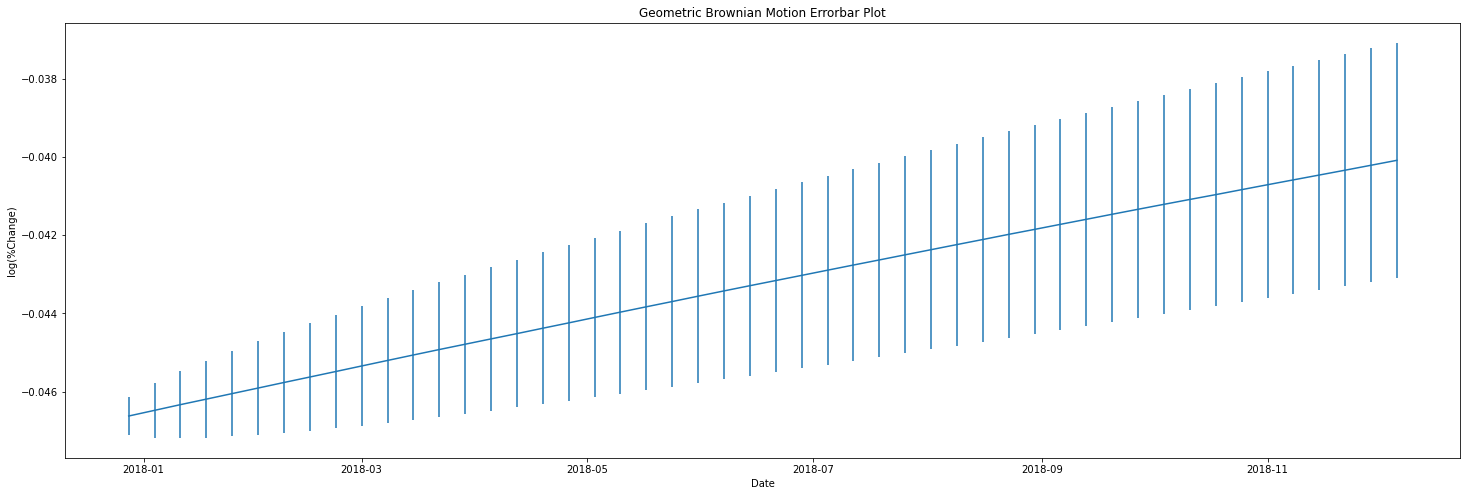

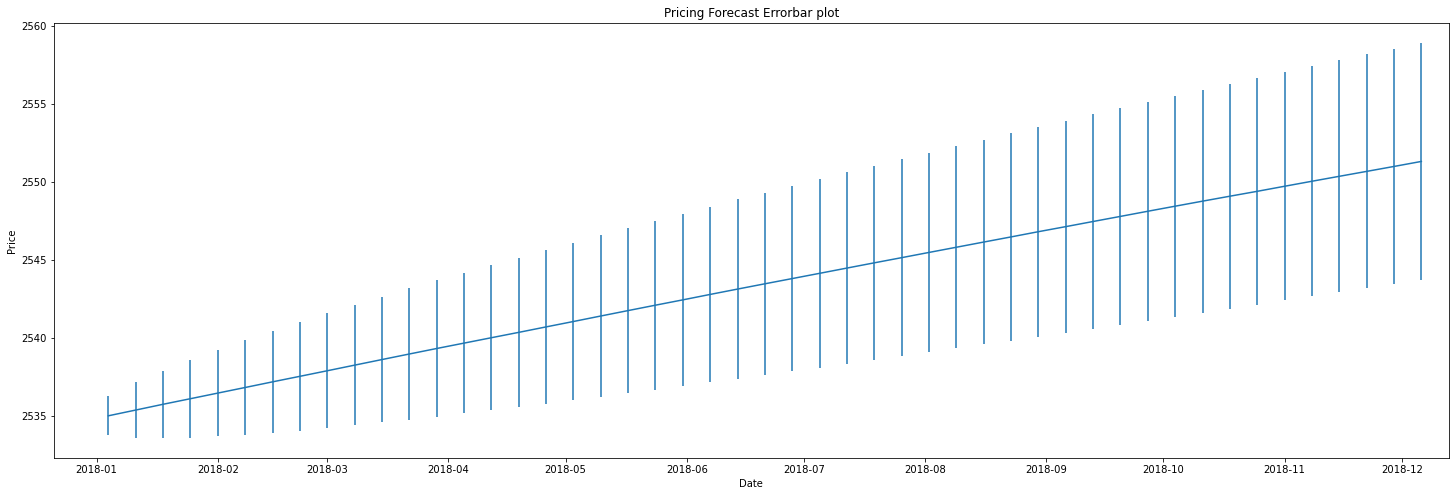

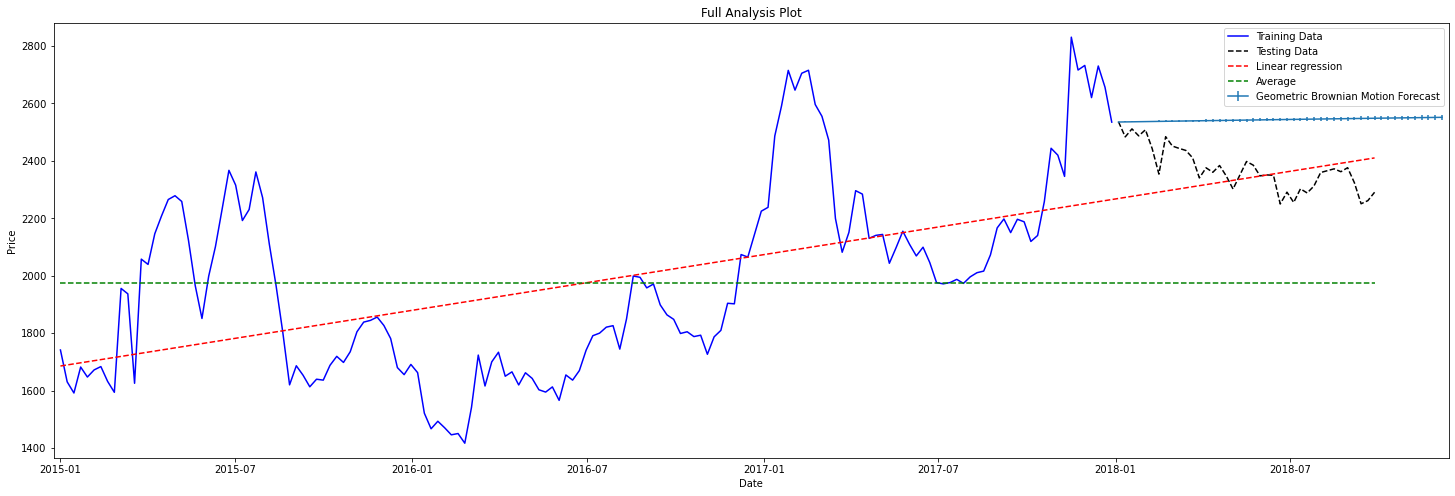

In [4]:
GBM_forecasts, df_forecast = GBM(dfall, fit_col, start_date = '1/1/2015', end_date = '12/31/2017', test_end = '09/30/2018', nsteps=50, nsims = 100000, GBMsigma = 1)

In [5]:
print('Shape of GBM_forecasts', GBM_forecasts.shape)
print('shape of df_forecasts', df_forecast.shape)

Shape of GBM_forecasts (50, 100000)
shape of df_forecasts (246, 2)
